데이터셋:  https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [3]:
import pandas as pd

In [4]:
diabetes = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# 정보확인
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# 결측치 확인
diabetes.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# 이상치 확인
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(diabetes[cols] == 0).sum(axis=0)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [8]:
# 범주별 데이터수
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

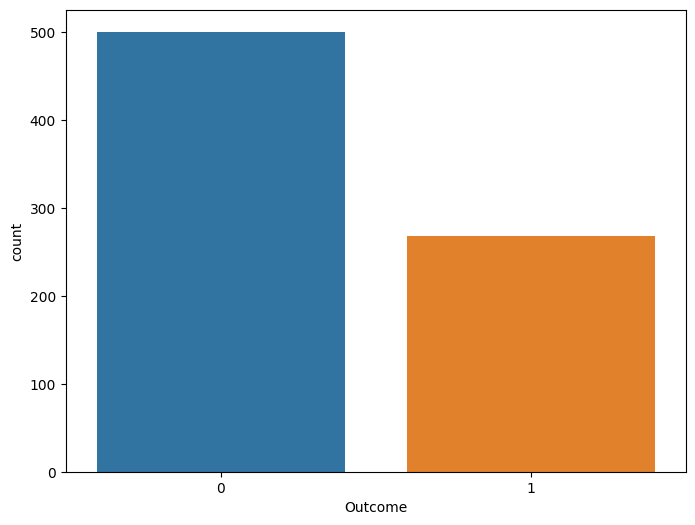

In [9]:
#데이터 시각화

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(x='Outcome',data=diabetes)
plt.show()

In [10]:
# 범주별 데이터 수
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
# 특성과 레이블 분리
X_data = diabetes.drop(['Outcome'], axis=1)
X_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
# 레이블 데이터 'Outcome' 추출
y_data = diabetes['Outcome']
y_data.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
# 테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [14]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614,) (154,)


In [15]:
# 이상치 처리 - 이상치에 평균 적용
import numpy as np

def impute_zero(data,col):
  df=data.loc[data[col] !=0 , col]
  avg=np.sum(df)/len(df)
  k=len(data.loc[data[col]==0, col])
  data.loc[data[col] ==0, col] = avg
  print('%s : fixed %d, mean: %.3f' %(col,k,avg))

for col in cols:
  impute_zero(X_train, col)

Glucose : fixed 5, mean: 121.847
BloodPressure : fixed 24, mean: 72.239
SkinThickness : fixed 176, mean: 28.596
Insulin : fixed 290, mean: 154.330
BMI : fixed 7, mean: 32.352


In [16]:
# 이상치 확인
(X_train[cols] ==0).sum(axis=0)

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [17]:
# 테스트 데이터 이상치 처리
for col in cols:
  impute_zero(X_test, col)

Glucose : fixed 0, mean: 121.052
BloodPressure : fixed 11, mean: 73.091
SkinThickness : fixed 51, mean: 31.524
Insulin : fixed 84, mean: 161.186
BMI : fixed 4, mean: 32.883


In [18]:
# 테스트 정규화

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print(X_train_s[:5])

[[-5.26396861e-01 -1.25832567e+00  0.00000000e+00  4.22787785e-16
   0.00000000e+00  1.02533391e-15 -4.90734790e-01 -1.03594038e+00]
 [ 1.58804586e+00 -3.27397242e-01  8.07407436e-01 -5.46930179e-01
   0.00000000e+00 -5.99178052e-01  2.41502991e+00  1.48710085e+00]
 [-8.28460107e-01  5.70283740e-01 -2.17042447e+00 -1.14195109e+00
  -8.20791983e-01 -5.27026593e-01  5.49160552e-01 -9.48938958e-01]
 [-1.13052335e+00  1.30172750e+00 -1.83955426e+00  4.22787785e-16
   0.00000000e+00 -1.50828644e+00 -6.39291267e-01  2.79212217e+00]
 [ 6.81856121e-01  4.04046521e-01  6.41972330e-01  1.00012419e+00
   2.48169622e+00  1.99827450e+00 -6.86829340e-01  1.13909516e+00]]


In [19]:
# 넘파이 배열로 타입 변경- 이상치 확인

y_train = y_train.values
y_test=y_test.values

print(type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### optimizer: Adam, activation: relu, relu, sigmoid

In [20]:
# 모델 만들기

from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential()
  model.add(layers.Dense(12,input_dim=8, activation='relu'))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model

In [21]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# 모델의 컴파일-binary_crossentropy

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [23]:
# 모델 학습
history = model.fit(X_train_s, y_train, epochs=500, batch_size=16, validation_split=0.2,verbose=1)

Epoch 1/500
31/31 [==============================] - 2s 18ms/step - loss: 0.6647 - acc: 0.6640 - val_loss: 0.6935 - val_acc: 0.6098
Epoch 2/500
31/31 [==============================] - 0s 3ms/step - loss: 0.6176 - acc: 0.6640 - val_loss: 0.6389 - val_acc: 0.6098
Epoch 3/500
31/31 [==============================] - 0s 3ms/step - loss: 0.5842 - acc: 0.6640 - val_loss: 0.6018 - val_acc: 0.6179
Epoch 4/500
31/31 [==============================] - 0s 3ms/step - loss: 0.5604 - acc: 0.6619 - val_loss: 0.5729 - val_acc: 0.6179
Epoch 5/500
31/31 [==============================] - 0s 3ms/step - loss: 0.5413 - acc: 0.6680 - val_loss: 0.5500 - val_acc: 0.6179
Epoch 6/500
31/31 [==============================] - 0s 3ms/step - loss: 0.5258 - acc: 0.6802 - val_loss: 0.5344 - val_acc: 0.6504
Epoch 7/500
31/31 [==============================] - 0s 3ms/step - loss: 0.5146 - acc: 0.6904 - val_loss: 0.5217 - val_acc: 0.6748
Epoch 8/500
31/31 [==============================] - 0s 4ms/step - loss: 0.5051 - 

In [24]:
# 학습곡선 그리기

import matplotlib.pyplot as plt

def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'],hist['loss'],label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'],label='Val Loss')

  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'],hist['acc'],label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'],label='Val Accuracy')
  plt.legend()

  plt.show()

In [24]:
plot_history(history)

In [25]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'], label='Val Accuracy')
  plt.legend()

  plt.show()

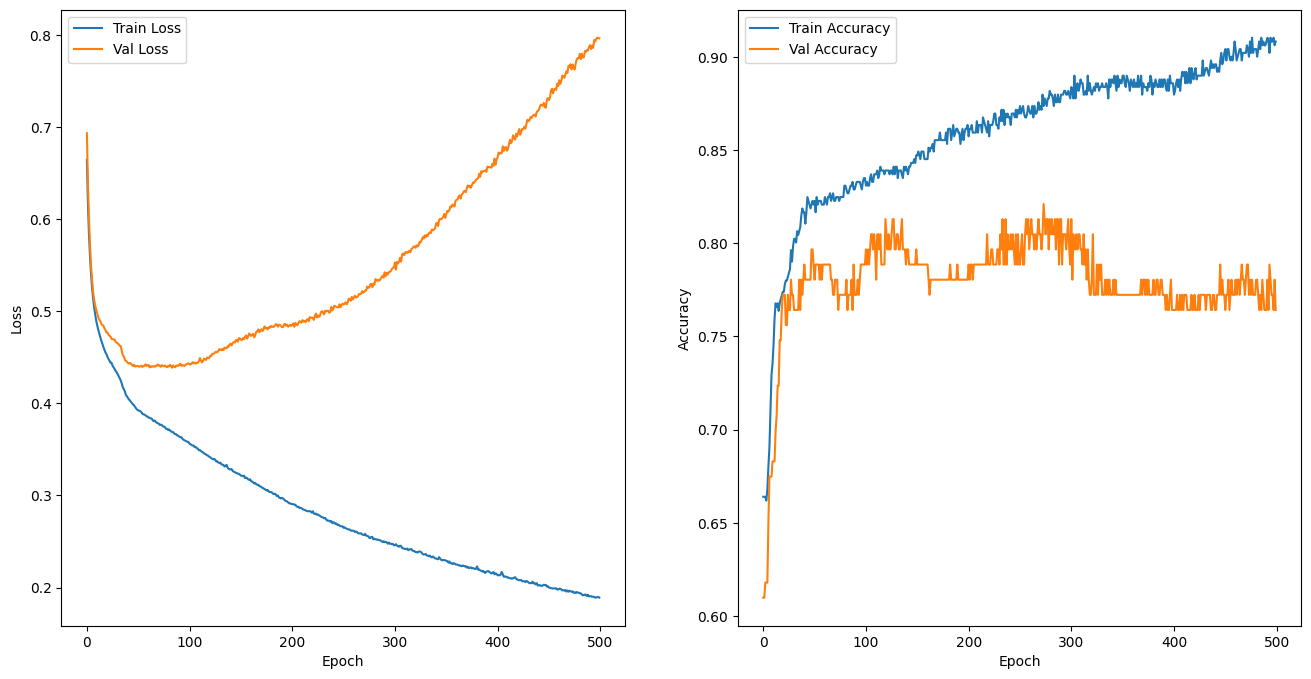

In [26]:
plot_history(history)